# Homework 1: Probability Review and Linear Regression

**Due date**: February 7, Wednesday by 11:59pm

## Setup

To run and solve this assignment, you must have access to a working Jupyter Notebook installation. We recommend Google Colab. If you are already familiar with Jupyter and have your own installation, you may use it; however, you will have to tweak Colab-specific commands we've entered here (for example, file uploads).

To use Google Colab:

1. Download this `ipynb` file.
2. Navigate to https://colab.research.google.com/ and select `Upload` in the pop-up window.
3. Upload this file. It will then open in Colab.
4. Now, upload the dataset associated with this assignment to the Colab runtime. On the left side of the screen, click on "Files" (denoted by a **folder icon**) and then click on "Upload to session storage" (denoted by a **file icon with an up arrow**).
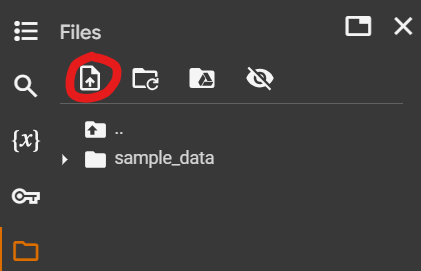

Upload the dataset (`Dry_Bean_Dataset.csv`). (if you get lost in the directory structure by hitting the "up one directory" button which is confusingly also indicated by an up arrow on a directory icon rather than a file icon, you can either refresh the page, or instead select the three dots next to the "content" folder and hit "upload" from there).

The below statements assume that you have already followed these instructions. If you need help with Python syntax, NumPy, or Matplotlib, you might find Week 1 discussion material useful.

To run code in a cell or to render Markdown+LaTeX press Ctrl+Enter or "`Run`" button above. To edit any code or text cell, double-click on its content. Put your solution into boxes marked with **`[double click here to add a solution]`** and press Ctrl+Enter to render text. You can add cells via `+` sign at the top left corner. A useful reference for looking up LaTeX symbols (and an application of machine learning in the wild!) is https://detexify.kirelabs.org/classify.html.

**Submission instructions**: please upload your completed solution file (.IPYNB) as well as a .pdf version (ctrl+p -> save as pdf) to Gradescope by the due date (see Schedule).

## Probability Review

### 1. Conditional Distributions (10 pts)



Over two consecutive days, we monitor whether or not a rain sensor detects rainfall. Let $A$ be the event "The sensor detects rain on the first day" and $B$ be the event "The sensor detects rain on the second day". We have the a priori probability model:

$$P[A] = 0.2, \ P[B] = 0.4$$

Under each of the following different assumptions, calculate $P\left[\lnot{A} \cap B\right]$ and $P[A|B]$.

**a.** If $A$ and $B$ are **independent** events.

**b.** If it rains on the first day, then it will certainly rain on the second day as well.

**c.** If it rains on the first day, then it will be twice as likely for it to rain on the second day (than if it did not rain on the first day).


***SOLUTIONS***

**a.** $P\left[\lnot{A} \cap B\right]$ = $0.32$, and  $P[A|B]$ = $0.2$


**b.** $P\left[\lnot{A} \cap B\right]$ = $0.2$, and  $P[A|B]$ = $0.5$ (Using Bayes Theorem)


**c.** $P\left[\lnot{A} \cap B\right]$ = $0.24$, and  $P[A|B]$ = $0.4$ (Also Using Bayes Theorem)

### 2. Expectation and Covariance (20 pts)

Let $X_1,X_2,X_3,X_4 \sim N(\mu,\sigma^2)$ sampled IID from known distributions. Define:

$$U = X_1 X_2 - 2X_3 X_4$$
$$V = X_2 X_3 + 2X_1 X_4$$

Answer the following questions in terms of $\mu$ and $\sigma$ :

**a.** Find $E[U]$ and $E[V]$.

**b.** What are $Var[U]$ and $Var[V]$?

**c.** What is $Cov[U,V]$?

**d.** What is covariance and what is correlation? Explain in your own words.




***SOLUTIONS***

**a.**

$E[U]= $ $- \mu^2$

$E[V] = $ $ 3\mu^2$

**b.**




$Var[U]=Var[X1​X2​−2X3​X4​]=Var[X1​X2​]+4Var[X3​X4​]−4Cov[X1​X2​,X3​X4​]$

$Var[V]=Var[X2​X3​+2X1​X4​]=Var[X2​X3​]+4Var[X1​X4​]+4Cov[X1​X4​,X2​X3​]$


Covariance between IID RV's = 0.

$var[U] = $ $5\sigma^4$

$var[V] = $ $5\sigma^4$

**c.**

$cov(U,V) =  $  $0$

**d.**

*Covariance:*

The level at which two variables change together.



*Correlation:*

The level at which two variables are related to one another. Independence means zero relatedness.

### 3. Closed-Form Maximum Likelihood (15 pts)

Assume that we are given $n$ iid samples $(x_1, ..., x_n)$ from each $P(x \ | \ \theta)$ given below. Compute the maximum likelihood estimates (MLEs) for the parameter $\theta$ of the given distributions.

**a.** $P(x \ | \ \theta) = \frac{1}{\theta} e^{\frac{-|x|}{\theta^2}}$

**b.** $P(x\ | \ \theta) = \theta^3 x^2 e^{-\theta x}$ for $x \geq 0$

**c.**  $P(x \ | \ \theta) = \frac{1}{1-\theta}$ for $ \theta \leq x \leq 1$


***SOLUTIONS***

**a.**

$\theta = \sqrt{2|x|}$

**b.**

$\theta = 3x$


**c.**
Given that $\theta$ may be equal to x which may be equal to one, the maximum value of the PMF would be as x and therefore $\theta$ approaches $1$. So I am going to say my answer is $\theta = 1$ (I am not sure because this would also be undefined and the probability infinite lol)

## ML Basics with Python
The following section will walk you through performing basic ML operations with Python, including loading, splitting, and observing a dataset using `pandas`, `sklearn`, and `matplotlib`, as well as running linear regression over features of a dataset using `sklearn`'s built-in methods.

### 4. Basics of `numpy`: solving a linear system (5 pts)

Let $A = \begin{bmatrix} 1 & 2 & 5\\ 4  & 1 & 3\\ 7  & 3 & 10 \end{bmatrix}$ and $b = \begin{bmatrix} 8 \\ -3 \\ -1 \end{bmatrix}$

Find $x = \begin{bmatrix} x_1 \\ x_2 \\ x_3 \end{bmatrix}$ where $Ax=b$ using pseudoinverse.

In [16]:
import numpy as np

def create_data():
  '''
  creates matrix A:

  | 1  2  5 |
  | 4  1  3 |
  | 7  3  10|

  and vector b:
  | 8 |
  | -3|
  | -1|

  and vector x that that is the least-squares
  solution to Ax = b

  returns A, b, x
  '''




  ### ADD CODE HERE:
  ### Create numpy arrays for A and b
  #Matrix A
  A = np.array([[1, 2, 5], [4, 1, 3], [7, 3, 10]])
  B = np.array([8, -3, -1])
  x = np.linalg.solve(A,B)

  return A, B, x
  ##



A, b, x = create_data()
print(A)
print(b)
print(x)

[[ 1  2  5]
 [ 4  1  3]
 [ 7  3 10]]
[ 8 -3 -1]
[-1.83333333  7.83333333 -1.16666667]


### 5. Data Visualization with `pandas` and `matplotlib` (15 pts)

In the following set of problems, we'll look at how we can use linear regression to predict the area of a Bean based on its various features.

Each record in the database describes the different features of a Bean. The original problem is to predict the class of a Bean. However, the data has been preprocessed to predict the Area of the bean. Also, the number of training instances was reduced from 13611 to 1500. The attributes are deﬁned as follows (taken from the UCI Machine Learning Repository1):

**1. Perimeter (P)**: Bean circumference is defined as the length of its border.

**2. Major axis length (L)**: The distance between the ends of the longest line that can be drawn from a bean.

**3. Minor axis length (l)**: The longest line that can be drawn from the bean while standing perpendicular to the main axis.

**4. Aspect ratio (K)**: Defines the relationship between L and l.

**5. Eccentricity (Ec)**: Eccentricity of the ellipse having the same moments as the region.

**6. Convex area (C)**: Number of pixels in the smallest convex polygon that can contain the area of a bean seed.

**7. Equivalent diameter (Ed)**: The diameter of a circle having the same area as a bean seed area.

**8. Extent (Ex)**: The ratio of the pixels in the bounding box to the bean area.

**9. Solidity (S)**: Also known as convexity. The ratio of the pixels in the convex shell to those found in beans.

**10. Roundness (R)**: Calculated with the following formula: (4piA)/(P^2)

**11. Compactness (CO)**: Measures the roundness of an object: Ed/L

**12. ShapeFactor1 (SF1)**

**13. ShapeFactor2 (SF2)**

**14. ShapeFactor3 (SF3)**

**15. ShapeFactor4 (SF4)**

**16. Area (A)**: The area of a bean zone and the number of pixels within its boundaries.

We can see that the input attributes have a mixture of units.

#### Load the dataset and look at the features
First, we'll use `pandas` to load the dataset and use the `head()` function to get a glimpse of the dataset

In [18]:
# DO NOT CHANGE THIS CELL, JUST RUN IT
import pandas as pd

def analyze_dry_bean_data(file_path):
    """
    Analyze the Dry Bean Dataset.

    Parameters:
    - file_path (str): The path to the CSV file containing the Dry Bean Dataset.

    Returns:
    None

    This function reads the Dry Bean Dataset from a CSV file, displays the first few rows,
    summary statistics, shape, and the 'Perimeter' column of the DataFrame.

    """

    file_path = "Dry_Bean_Dataset.csv"

    # Read the CSV file into a DataFrame
    dry_bean_data = pd.read_csv(file_path)

    # Display the first few rows of the DataFrame
    print("Head of the DataFrame:")
    print(dry_bean_data.head())

    # Display the summary statistics of the DataFrame
    print("\nSummary Statistics:")
    print(dry_bean_data.describe())

    # Display the shape of the DataFrame
    print("\nDataFrame Shape:")
    print(dry_bean_data.shape)

    # Display the 'Perimeter' column
    print("\n'Perimeter' Column:")
    print(dry_bean_data['Perimeter'])


file_path = "Dry_Bean_Dataset.csv"
dry_bean_data = pd.read_csv(file_path)
analyze_dry_bean_data(file_path)

Head of the DataFrame:
   Perimeter  MajorAxisLength  MinorAxisLength  AspectRation  Eccentricity  \
0    637.061       240.712885       153.131916      1.571932      0.771557   
1    725.557       271.946743       176.907054      1.537230      0.759488   
2    886.334       341.543210       199.242313      1.714210      0.812214   
3    864.097       325.351627       202.614767      1.605765      0.782416   
4   1668.132       628.023197       400.806018      1.566901      0.769868   

   ConvexArea  EquivDiameter    Extent  Solidity  roundness  Compactness  \
0       29320     191.555450  0.741458  0.982913   0.892333     0.795784   
1       38019     218.957900  0.813542  0.990400   0.898831     0.805150   
2       53963     260.548101  0.689893  0.988029   0.852866     0.762855   
3       52079     256.055067  0.691956  0.988767   0.866646     0.787010   
4      198006     499.891074  0.834456  0.991202   0.886318     0.795975   

   ShapeFactor1  ShapeFactor2  ShapeFactor3  ShapeF

#### 5.a. Visualize the features
We're going to model the Bean Area using a linear regression model. For that, we need to find the features of the data that are correlated to the Area of the bean. Use `matplotlib` to plot the `Area` of the Bean on the y-axis and each input feature on the x-axis. Analyze which features are correlated to the Area and which are not. Then, proceed further.

For example, the graph between Shapefactor4 and Area should look like this:

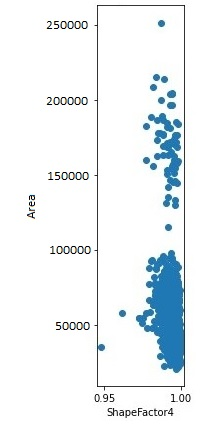


**Hint**: Your code should produce 15 plots, one plot for each input feature against the `Area`.

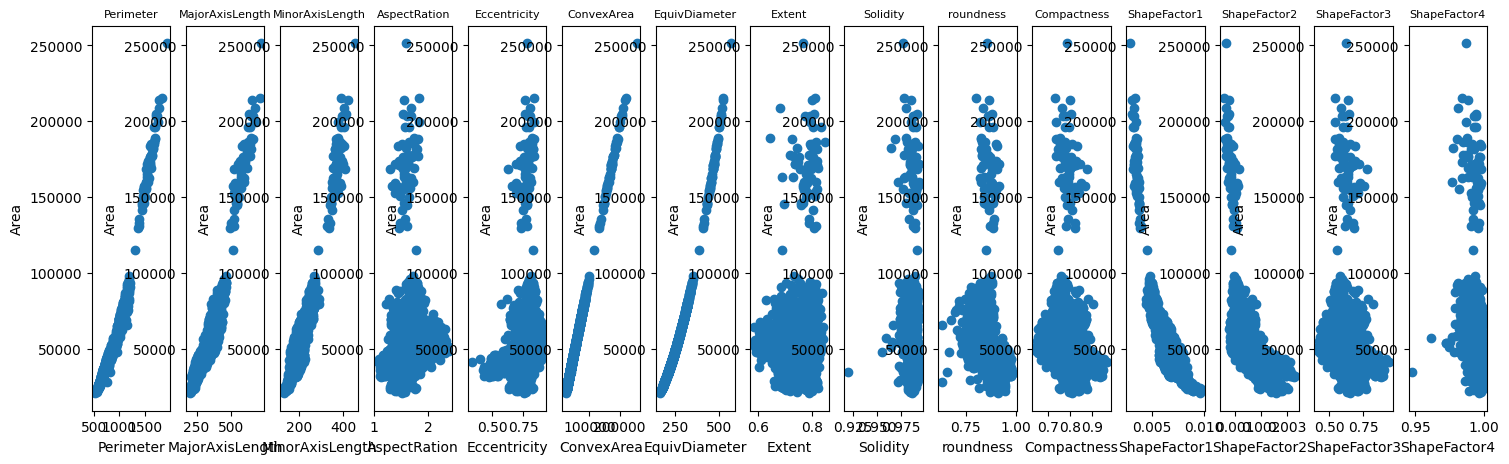

In [19]:
import matplotlib.pyplot as plt

def get_features_and_targets(data, feature, target_column):
    """
    Extracts features and target columns from data.

    Parameters:
    - data (pd.DataFrame): The DataFrame containing the dataset.
    - feature (str): The name of the feature column.
    - target_column (str): The name of the target variable column.

    Returns:
    - x (pd.Series): The values of the specified feature column.
    - y (pd.Series): The values of the specified target variable column.

    """
    ### ADD CODE HERE: Extract the feature and target variable
    # Your code only needs to define two variables.
    x = data[str(feature)]
    y = data[str(target_column)]
    

    return x, y


def plot_feature_vs_target(data, target_column='Area'):
    """
    Generate scatter plots for each feature against the target variable.

    Parameters:
    - data (pd.DataFrame): The DataFrame containing the dataset.
    - target_column (str): The name of the target variable.

    Returns:
    None

    This function creates subplots for each feature against the target variable in a scatter plot.

    """

    # Extract features and target variable
    dry_bean_features = data.columns[:-1]
    target = data[target_column]
    plt.figure(figsize=(18,5))

    # Create subplots for each feature within this figure
    # the following code will loop over the features and in order
    # to generate a separate plote for each feature.
    # In the following loop, `i` is an index (0, 1, 2, 3, etc)
    # and `feature` is a string that is equal to the name of the `i`th feature.
    for i, feature in enumerate(dry_bean_features):
        # Create subplots for each feature within this figure
        plt.subplot(1, len(dry_bean_features), i+1)

        # Extract features and target columns from data
        x, y = get_features_and_targets(data, feature ,target_column)

        # Plot the scatter plot
        plt.scatter(x, y, marker='o')
        plt.title(feature, fontsize=8)
        plt.xlabel(feature)
        plt.ylabel(target_column)


plot_feature_vs_target(dry_bean_data, target_column='Area')
plt.show()

#### 5.b. Select the best feature for a linear regression model
Suppose you are only going to use ONE single feature to perform your linear regression, rather than all 16. Then, you need to choose which of the 16 features to use.

From the plots above, which feature looks like it would work well for fitting a linear regression model? Pick just one, and assign it to the variable called `dry_bean_features`. *There might be more than one correct answer, feel free to experiment with all the features.*

In [21]:
def prepare_data_for_regression(data, feature_name, target_column='Area'):
    """
    Prepare data for linear regression.

    Parameters:
    - data (pd.DataFrame): The DataFrame containing the dataset.
    - feature_name (str): The name of the feature to use for linear regression.
    - target_column (str): The name of the target variable.

    Returns:
    - X (pd.Series): The selected feature for linear regression.
    - y (pd.Series): The target variable for linear regression.

    """

    ### ADD CODE HERE:
    # Define the variable `X` (feature for linear regression)
    X = data[str(feature_name)]
    # Define the variable `y` (target variable for linear regression)
    y = data[str(target_column)]

    ###

    return X,y

# ADD CODE HERE: Fill in the feature_name you have chosen
# Note that we are using 'Area' as our labels                            ##ADD your selected feature_name below
bean_features, bean_labels = prepare_data_for_regression(dry_bean_data, feature_name='ConvexArea', target_column='Area')

***Briefly explain your rationale for choosing this feature in the cell below. Also, pick one of the features that you didn't choose and explaine why that feature is not good for our purpose.***

***SOLUTION:***

I noticed among the graphs that "ConvexArea" is the most linear out of all of them, in terms of the distribution of datapoints. Something like "Extent" seems to have low coorelation to area and thus would not ideal to train for a linear regression model.


### 6. Train-Validation Splits (10 pts)



Train-validation splitting is a fundamental practice in machine learning. When fitting a model, we'd to divide our data into separate training and validation sets in order to fairly evaluate how our model performs.

Usually, we need to do *three* splits, train, test and validation so that we can use the validation split to test different models. However, in this homework you will only train one model once, so we will only make a train/validation split.

In this section, we will learn two ways to split our datasets: using `numpy` and `sklearn`. First, let us convert our panda dataframes to numpy array

In [22]:
# DO NOT CHANGE THIS CELL, JUST RUN IT
import numpy as np
import pandas as pd

def convert_to_numpy_arrays(features, labels):
    """
    Convert pandas DataFrames to numpy arrays.

    Parameters:
    - features (pd.Series): The feature variable.
    - labels (pd.Series): The target variable.

    Returns:
    - features_array (np.ndarray): Numpy array representing the feature variable.
    - labels_array (np.ndarray): Numpy array representing the target variable.

    """

    # Convert to numpy arrays and reshape if needed
    features_array = np.asarray(features).reshape(-1, 1)
    labels_array = np.asarray(labels).reshape(-1, 1)

    return features_array, labels_array

features_array, labels_array = convert_to_numpy_arrays(bean_features, bean_labels)

#### 6.1. Spliting data using `numpy`

First, let us shuffle our data (feel free to comment out the shuffling to see if there's anything change). This is a very common practice in ML to make the data "random" and improve the
generalization of the model at the end. To do this, we first need to stack our data to keep the indices correct. Once we have a "random" data matrix, let us split the matrix into train set and validation set.

In [56]:
# print(features_array.shape)
# print(labels_array.shape)




import numpy as np

def get_data_splits(data_matrix, train_ratio=0.8):
    """
    Split the data_matrix into training and validation sets.

    Parameters:
    - data_matrix (np.ndarray): Numpy array representing the combined features and labels.
    - train_ratio (float): The ratio of the dataset to be used for training (default is 0.8).

    Returns:
    - x_train (np.ndarray): Numpy array representing the features in the training set.
    - x_val (np.ndarray): Numpy array representing the features in the validation set.
    - y_train (np.ndarray): Numpy array representing the labels in the training set.
    - y_val (np.ndarray): Numpy array representing the labels in the validation set.

    """
    ### ADD CODE HERE:
    # Split the data_matrix into x_train, x_val y_train, y_val
    # The size of the training set is 80% the size of the whole dataset.
    # Hint: To check the shape of the matrix use data_matrix.shape
    # Hint: Look up "array slicing" to see how to do this quickly
    len_f = (features_array.shape[0])
    len_l = (labels_array.shape[0])

    train_fl = int(len_f*train_ratio)
    train_ll = int(len_l*train_ratio)

    x_train = data_matrix[:train_fl]
    y_train = data_matrix[:train_ll]
    x_val = data_matrix[train_fl:]
    y_val = data_matrix[train_ll:]




    ###

    return x_train, x_val, y_train, y_val

get_data_splits(dry_bean_data)


def split_and_shuffle_data(features, labels, train_ratio=0.8):
    """
    Split and shuffle data into training and validation sets.

    Parameters:
    - features (np.ndarray): Numpy array representing the feature variable.
    - labels (np.ndarray): Numpy array representing the target variable.
    - train_ratio (float): The ratio of the dataset to be used for training (default is 0.8).

    Returns:
    - x_train (np.ndarray): Numpy array representing the features in the training set.
    - x_val (np.ndarray): Numpy array representing the features in the validation set.
    - y_train (np.ndarray): Numpy array representing the labels in the training set.
    - y_val (np.ndarray): Numpy array representing the labels in the validation set.

    """

    # Combine features and labels to create a data matrix
    data_matrix = np.stack([labels.flatten(), features.flatten()], axis=1)

    # Shuffle the data
    np.random.shuffle(data_matrix)

    x_train, x_val, y_train, y_val = get_data_splits(data_matrix, train_ratio)

    return x_train, x_val, y_train, y_val

x_train_np, x_val_np, y_train_np, y_val_np = split_and_shuffle_data(features_array, labels_array, train_ratio=0.8)
print(x_train_np.shape)
print(x_val_np.shape)

(1200, 2)
(300, 2)


#### 6.2. Splitting our Bean data into training and testing sets using `sklearn`

Use the same process to split our Bean data features corresponding targets. Again, observe the sizes and samples of the resulting training and validation sets. (Note that our dataset only has one feature)

In [57]:
from sklearn.model_selection import train_test_split

def split_data_sklearn(features, labels, val_size=0.2, random_state=42):
    """
    Split data into training and validation sets using train_test_split from scikit-learn.

    Parameters:
    - features (np.ndarray): Numpy array representing the feature variable.
    - labels (np.ndarray): Numpy array representing the target variable.
    - val_size (float): The proportion of the dataset to include in the validation split (default is 0.2).
    - random_state (int or None): Seed used by the random number generator (default is 42).

    Returns:
    - x_train (np.ndarray): Numpy array representing the features in the training set.
    - x_val (np.ndarray): Numpy array representing the features in the validation set.
    - y_train (np.ndarray): Numpy array representing the labels in the training set.
    - y_val (np.ndarray): Numpy array representing the labels in the validation set.

    """

    ### ADD CODE HERE:
    # Use train_test_split to split the data into training and validation sets.
    # (Note: 20% of the total data amount is a typical size for the validation set.)
    x_train, x_val, y_train, y_val = train_test_split(features_array, labels_array, test_size=0.2)

    ###

    return x_train, x_val, y_train, y_val

x_train_sk, x_val_sk, y_train_sk, y_val_sk = split_data_sklearn(bean_features, bean_labels, val_size=0.2, random_state=42)
print("Shape of X_train:")
print(x_train_sk.shape)

print("Shape of y_train:")
print(y_train_sk.shape)

print("Shape of X_val:")
print(x_val_sk.shape)

print("Shape of y_val:")
print(y_val_sk.shape)

Shape of X_train:
(1200, 1)
Shape of y_train:
(1200, 1)
Shape of X_val:
(300, 1)
Shape of y_val:
(300, 1)


### 7. Linear Regression (10 pts)


Now, we'll fit a linear regression model to our data using `sklearn`'s built-in linear regression method. We will also test the model with our validation data, and see how it performs.

#### 7.a. Fit the linear regression model with our bean data
Use `sklearn`'s built-in linear regression method to fit a model using the training data you got as a result of problem 6. *Refer to the documentation [here](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) to better understand how this method is used.*

In [150]:
from sklearn.linear_model import LinearRegression

def train_linear_regression_model(features, labels):
    """
    Train a linear regression model using the given features and labels.

    Parameters:
    - features (np.ndarray): Numpy array representing the features for training.
    - labels (np.ndarray): Numpy array representing the target variable for training.

    Returns:
    - reg (LinearRegression): The trained linear regression model.

    """

    ### ADD CODE HERE:
    # Use the LinearRegression() method to fit a model using the training data. You can use either the training data that you
    # split using sklearn or numpy. If you implemented everything correctly, they should yield the same result.
    reg = LinearRegression().fit(features, labels)

    return reg
    ###



trained_model = train_linear_regression_model(x_train_np, y_train_np)
print(trained_model)

LinearRegression()


#### 7.b. Plot the data against the model
Use `matplotlib` to visualize the fit of the model alongside the Bean feature data. You will need to extract the parameters of the model, the coefficient $w$ and the bias $b$, to do this.

Your output should look somewhat like this (the image is just an example! The actual output will certainly have some differences from this):

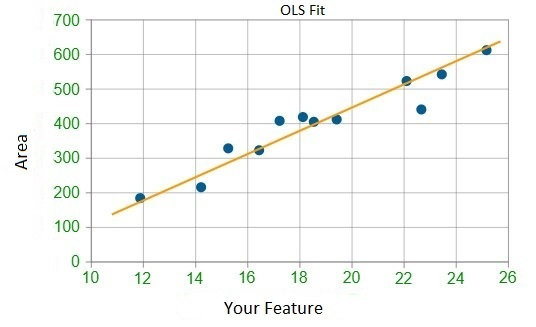

(1500,)
(2, 2)
(2,)


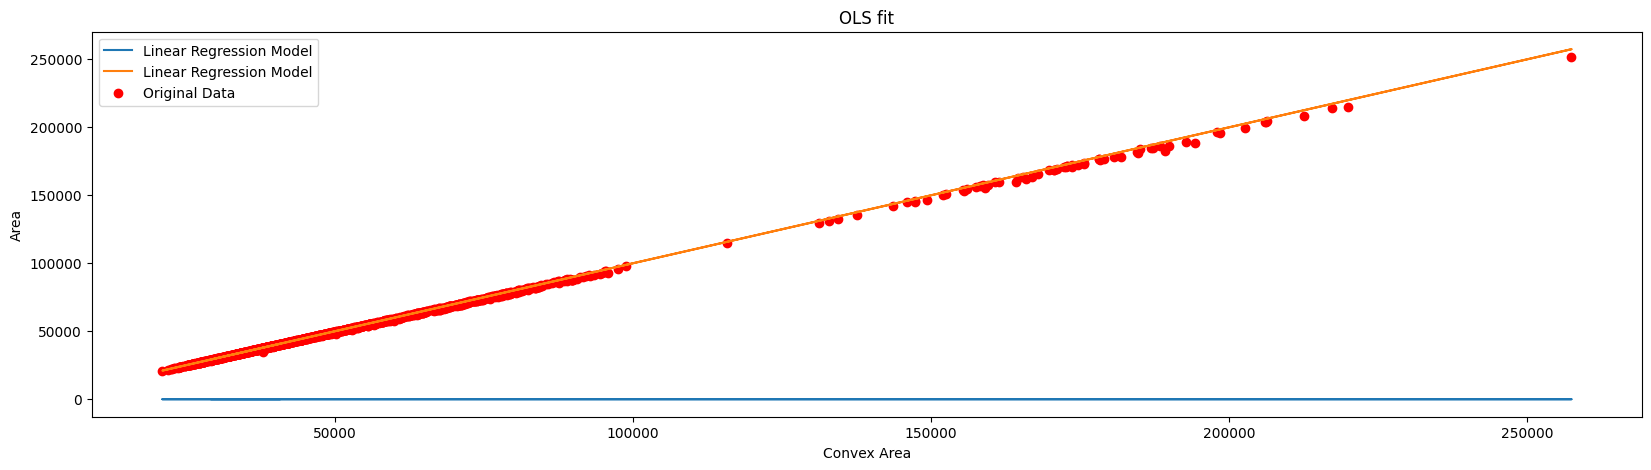

In [151]:
import matplotlib.pyplot as plt

def get_weights_and_bias(model):
    """
    Extract the coefficients and intercept from a linear regression model.

    Parameters:
    - model: The trained linear regression model.

    Returns:
    - w: Coefficient of the model.
    - b: Intercept of the model.
    """

    ### ADD CODE HERE:
    # Extract the coefficient of the model, w
    w = model.coef_
    b = model.intercept_
    # print(w)
    # print(b)
    # Extract the intercept of the model, b

    ###

    return w, b


def plot_linear_regression_model(model, features, labels):
    """
    Plot the linear regression model and the original feature data.

    Parameters:
    - model: The trained linear regression model.
    - features (np.ndarray): Numpy array representing the features.
    - labels (np.ndarray): Numpy array representing the target variable.

    Returns:
    None

    """

    w, b = get_weights_and_bias(model)
    ones_column = np.ones((1500, 1))
    features_w_ones = np.c_[ones_column, features]
    print(features.shape)


    #HEY IF YOU ARE READING THIS, THIS WAS A PAIN TO FIX
    #MAYBE REMIND US THAT ADDING A ONES COLUMN WOULD HELP??


    # print(x_with_ones) 

    print(w.shape)
    print(b.shape)

    # features_fix = features.reshape(-1, 1)
    # Extract weights and bias

    # Create plot figure
    plt.figure(figsize=(20, 5))
    # ones_column = np.ones((1500, 1))
    # new_matrix = np.hstack((ones_column, features))
    # Use plt.plot() to plot the model curve
    plt.plot(features, (features_w_ones @ w) + b, label="Linear Regression Model")
    # Use plt.scatter() to plot the original feature data
    plt.scatter(features, labels, label="Original Data", color='red', marker='o')

    plt.title("OLS fit")
    plt.xlabel("Convex Area")
    plt.ylabel("Area")
    plt.legend()
    plt.show()

plot_linear_regression_model(trained_model, bean_features, bean_labels)

#### 7.c. Print the training loss of the model
The loss of the linear regression model is given by L = $\frac{1}{2m}\sum_{i=1}^m(y_i - \hat{y_i})^2$ where m is the number of training examples. Using your predictions on the training data and the actual output, print the training loss of your model. **For full credit: DO NOT USE a for/while loop.**

In [152]:
def calculate_loss(model, features, labels):
    """
    Calculate the loss of the linear regression model on the given data.

    Parameters:
    - model: The trained linear regression model.
    - features (np.ndarray): Numpy array representing the features.
    - labels (np.ndarray): Numpy array representing the target variable.

    Returns:
    - loss (float): The calculated loss.

    """

    ### ADD CODE HERE:
    # Use model.predict() to make predictions on the training data
    yhat = model.predict(features)

    # Calculate the mean squared error loss
    # hint: use NumPy for element-wise operations to receive FULL CREDIT
    # print(labels)
    # print(yhat)
    m = (x_train_np.shape[0])
    MSE =  (((labels-yhat)**2).mean()) # seems low

    ###

    return MSE

loss_value = calculate_loss(trained_model, x_train_np, y_train_np)
print("Loss is " + str(loss_value))

Loss is 1.6932387138960476e-22


#### 7.d. Plot the true targets against our estimated values
Let's see how well our model performs! Plot the model fit (as in 7.b.) and the model's predictions on the test data. This will give us a clear picture of how well the model performs on unseen data. Also print the actual test labels so we can compare the model's predictions with the expected output. (Remember, the model was trained only on the training data. Hence, the test data is new data for the model). **(The output of this would be similar to that of 7.b.).**

(300, 2)
(2, 2)
(2,)


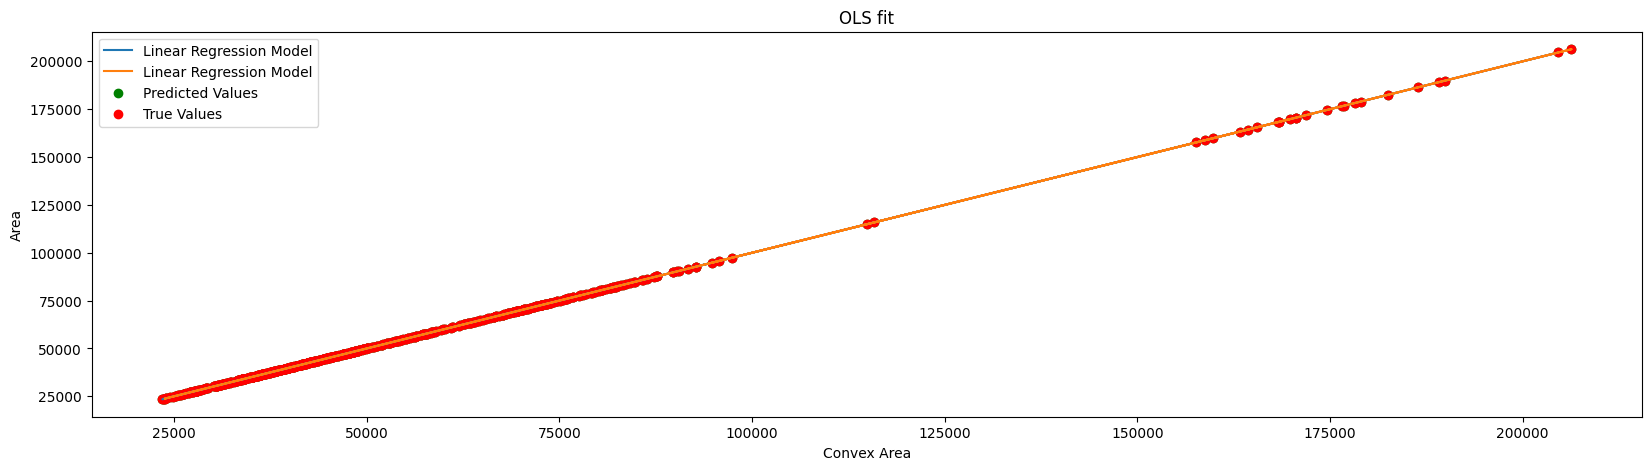

In [153]:
# DO NOT CHANGE THIS CELL, JUST RUN IT
def plot_linear_regression_model_with_val_data(model, features_val, labels_val):
    """
    Plot the linear regression model, the predicted values on validation data, and the true values on validation data.

    Parameters:
    - model: The trained linear regression model.
    - features_val (np.ndarray): Numpy array representing the features for validation.
    - labels_val (np.ndarray): Numpy array representing the true target variable for validation.

    Returns:
    None

    """

    # Extract weights and bias
    w, b = get_weights_and_bias(model)

    # Create plot figure
    print(features_val.shape)
    print(w.shape)
    print(b.shape)
    plt.figure(figsize=(20, 5))
    # Use plt.plot() to plot the model curve
    plt.plot(features_val, (features_val @ (w + b)), label="Linear Regression Model")

    # Use plt.scatter() to plot the predicted values on validation data
    plt.scatter(features_val, model.predict(features_val), label="Predicted Values", color='green', marker='o')

    # Use plt.scatter() to plot the true values on validation data
    plt.scatter(features_val, labels_val, label="True Values", color='red', marker='o')

    plt.title("OLS fit")
    plt.xlabel("Convex Area")
    plt.ylabel("Area")
    plt.legend()
    plt.show()

plot_linear_regression_model_with_val_data(trained_model, x_val_np, y_val_np)

#### 7.e. Print the testing loss of the model
Print the validation loss of the model (like 7.c.).

In [154]:
# Hint: you can use your previous calculate_loss function

### ADD CODE HERE:

yhat = trained_model.predict(x_val_np)
labels = y_val_np
MSE =  (((labels-yhat)**2).mean()) # seems low (still)

###

print("Loss is " + str(loss_value))
#training loss: 1.6932387138960476e-22
#val loss:      1.6932387138960476e-22

#i am so confused

Loss is 1.6932387138960476e-22


The loss for the training set **may** be slightly more than that of the validation set. This is because we are slightly overfitting to the training data.

Run your code a couple of times and think about why the losses change like that.